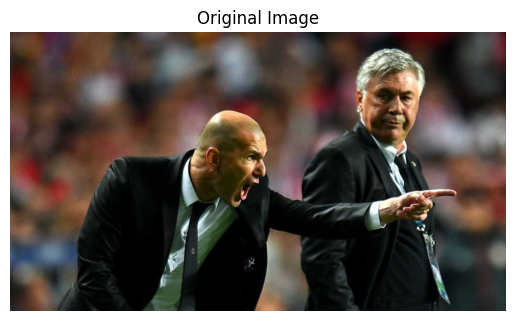


0: 384x640 2 persons, 172.6ms
Speed: 3.1ms preprocess, 172.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


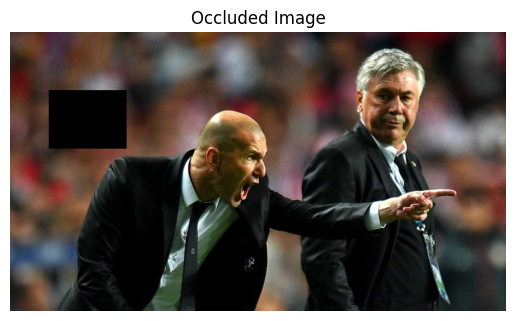


0: 384x640 2 persons, 198.8ms
Speed: 10.2ms preprocess, 198.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


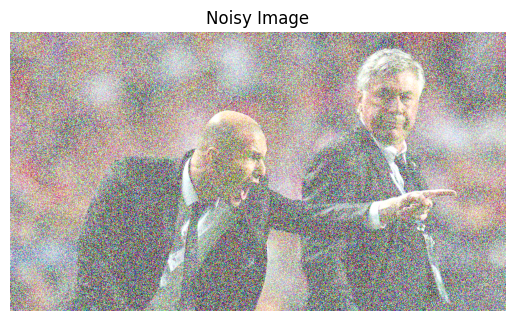


0: 384x640 (no detections), 228.0ms
Speed: 2.9ms preprocess, 228.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


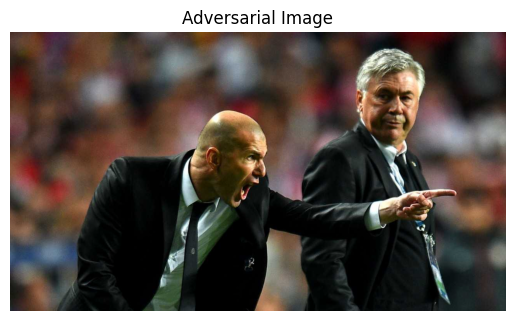


0: 384x640 2 persons, 426.1ms
Speed: 28.1ms preprocess, 426.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


In [9]:

# Step 1: Install the YOLOv5 package from Ultralytics
!pip install ultralytics

# Step 2: Import necessary libraries
import torch
import numpy as np
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO
import requests # import requests to handle URL

# Step 3: Load the pre-trained YOLOv5 model using the correct path
# This will automatically download and load the 'yolov5s' model from the Ultralytics repository
model = YOLO('yolov8n.pt')  # YOLOv8-nano model, pretrained on COCO dataset (more compact, you can also try 'yolov8s.pt')

# Step 4: Load and display a test image
def load_image(image_path):
    if image_path.startswith('http'): # Check if its a URL
        response = requests.get(image_path, stream=True).raw
        img = np.asarray(bytearray(response.read()), dtype="uint8")
        img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    else: # If its a file path
        img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    return img

# Example image for ISR (change the URL for another image if needed)
image_path = 'https://ultralytics.com/images/zidane.jpg'
image = load_image(image_path)

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 5: Perform object detection on the clean image
results = model(image)
results[0].show()  # Access the Results object within the list and display the detection results

# Step 6: Red Team Test 1 - Occlusion
def add_occlusion(image, box_coords):
    """Add occlusion by drawing a black rectangle over part of the image."""
    (x1, y1, x2, y2) = box_coords
    occluded_image = image.copy()
    cv2.rectangle(occluded_image, (x1, y1), (x2, y2), (0, 0, 0), -1)  # Draw black rectangle
    return occluded_image

# Define a region to occlude (e.g., partially occlude a detected object)
occluded_image = add_occlusion(image, (100, 150, 300, 300))

# Display the occluded image
plt.imshow(occluded_image)
plt.title('Occluded Image')
plt.axis('off')
plt.show()

# Perform object detection on the occluded image
results_occluded = model(occluded_image)
results_occluded[0].show()  # Access the Results object within the list and display the detection results

# Step 7: Red Team Test 2 - Noise addition
def add_noise(image, noise_level=30):
    """Add Gaussian noise to the image."""
    noise = np.random.normal(0, noise_level, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Add noise to the image
noisy_image = add_noise(image)

# Display the noisy image
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')
plt.show()

# Perform object detection on the noisy image
results_noisy = model(noisy_image)
results_noisy[0].show()  # Access the Results object within the list and display detection results on noisy image

# Step 8: Red Team Test 3 - Adversarial Perturbation (FGSM-like approach)

def create_adversarial_image(image, epsilon=0.01):
    """Create an adversarial image using a simple perturbation method."""
    # Generate small perturbation (this is just a simulation of adversarial noise)
    perturbation = epsilon * np.sign(np.random.randn(*image.shape))
    # Ensure both image and perturbation have the same data type
    perturbation = perturbation.astype(np.float32)
    adversarial_image = cv2.add(image.astype(np.float32), perturbation)

    # Clip values to be within the valid range for uint8 (0-255) and convert back to uint8
    adversarial_image = np.clip(adversarial_image, 0, 255).astype(np.uint8)

    return adversarial_image


# Generate adversarial image
adversarial_image = create_adversarial_image(image)

# Display the adversarial image
plt.imshow(adversarial_image)
plt.title('Adversarial Image')
plt.axis('off')
plt.show()

# Perform object detection on the adversarial image
results_adversarial = model(adversarial_image)
results_adversarial[0].show()  # Access the Results object within the list and display detection results on adversarial image
